In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

C:\Users\Aquib\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h3>3.1 Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.</h3>

In [2]:
df = pd.read_csv('GOLD.csv')

In [3]:
df.set_index('Date',inplace=True)
df.index = pd.to_datetime(df.index)

In [4]:
X = df.loc[:,'Price':'Low']
y = df['new']

In [5]:
from sklearn.cross_validation import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [6]:
y_train.size

409

In [7]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_pred = linear.predict(X_test)

In [9]:
df['Linear'] = linear.predict(df.loc[:,'Price':'Low'])

In [10]:
poly = df.dropna(axis=0)

In [11]:
X = poly.loc[:,'Price':'Low']
y = poly['Pred']

In [12]:
from sklearn.cross_validation import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
df['Poly'] = lin_reg2.predict(poly_reg.fit_transform(df.loc[:,'Price':'Low']))

C:\Users\Aquib\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


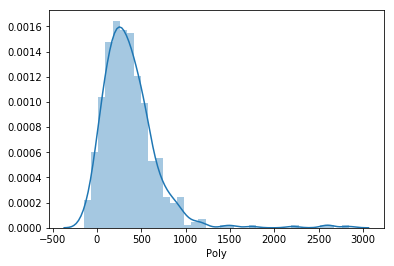

In [16]:
sns.distplot(df['Poly'])

C:\Users\Aquib\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


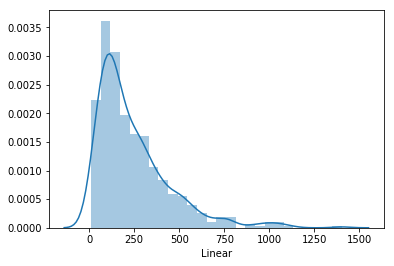

In [17]:
sns.distplot(df['Linear'])

In [18]:
df.drop(columns=['new','Pred'],axis=1,inplace=True)

<h4>CAPM CAPM Analysis and Beta Calculation using regression</h4>

In [33]:
months = 3
days = months * 21

# Reading sulzon Stock and nifty index data
sulzon = pd.read_csv("Data/Small_Cap/SUZLON.csv")
nifty = pd.read_csv("Data/Nifty50/Nifty50.csv")

# Taking SULZON Stock of past 3 months
sulzon_stock = sulzon.tail(days)
sulzon_stock.Date = pd.to_datetime(sulzon_stock.Date)
sulzon_stock = sulzon_stock.set_index('Date')

# Taking Nifty50 index of past 3 months
nifty_stock = nifty.tail(days)
nifty_stock.Date = pd.to_datetime(nifty_stock.Date)
nifty_stock = nifty_stock.set_index('Date')

C:\Users\Aquib\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
# Daily Returns of SULZON stock for last 3 months
sulzon_daily_return = sulzon_stock['Close Price'].pct_change().dropna()

# Daily Returns of Nifty50 index for last 3 months
nifty_daily_return = nifty_stock.Close.pct_change().dropna()

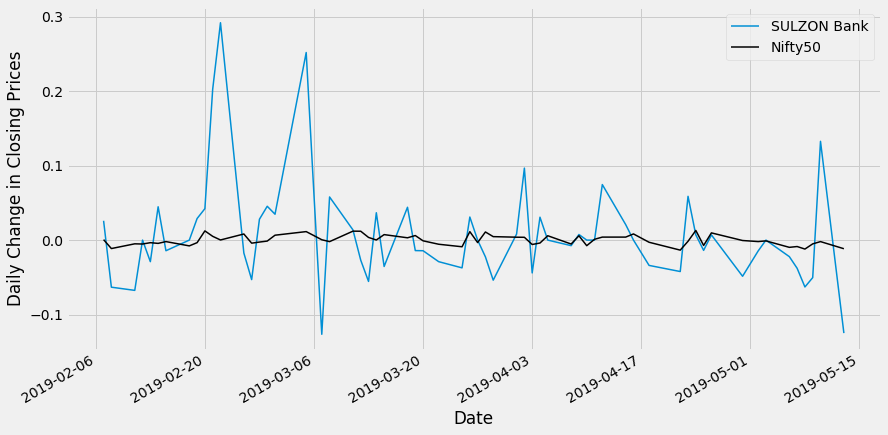

In [35]:
with plt.style.context('fivethirtyeight'):
    sulzon_daily_return.plot(figsize=(13,7),label='SULZON Bank', linewidth=1.5)
    nifty_daily_return.plot(color='k', figsize=(13,7), label='Nifty50', linewidth=1.5)
    plt.ylabel("Daily Change in Closing Prices")
    plt.legend()
    plt.show()

In [36]:
# Reshaping for Regression Purpose
sulzon_daily_return = sulzon_daily_return.ravel().reshape(-1,1)
nifty_daily_return = nifty_daily_return.ravel().reshape(-1,1)

<h2>
3.2.2 Calculating Daily Beta value using Linear Regression

In [37]:
daily_beta_regressor = LinearRegression()
daily_beta_regressor.fit(nifty_daily_return, sulzon_daily_return)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# Beta Value
daily_beta_regressor.coef_.item()

3.4868570632863847

<h2>3.2.3 The Monthly Beta value. (Monthly= Monthly returns)

In [41]:
close_prices= pd.concat([sulzon['Date'],sulzon['Close Price'],nifty['Close']],axis=1)
close_prices.columns = ['Date','SULZON', 'Nifty']
close_prices.head()

,Date,SULZON,Nifty
0,15-May-2017,19.6,9445.40
1,16-May-2017,19.7,9512.25
2,17-May-2017,19.9,9525.75
3,18-May-2017,20.0,9429.45
4,19-May-2017,20.6,9427.90


In [42]:
close_prices.Date =  pd.to_datetime(close_prices.Date)
close_prices['monthwise'] = pd.to_datetime(close_prices['Date']).dt.to_period('M')
monthly_data=close_prices.groupby(['monthwise']).mean()
monthly_data

,SULZON,Nifty
monthwise,,
2017-05,19.657692,9498.557692
2017-06,18.861905,9606.954762
2017-07,18.911905,9850.119048
2017-08,16.819048,9901.183333
2017-09,16.447619,9977.916667
2017-10,15.705000,10138.677500
2017-11,14.763636,10324.754545
2017-12,14.090000,10322.262500
2018-01,15.440909,10771.154545


In [43]:
close_prices_monthly_change = monthly_data.pct_change(fill_method='ffill')*100
close_prices_monthly_change = close_prices_monthly_change.dropna(axis=0)
close_prices_monthly_change.shape

(24, 2)

In [44]:
X = close_prices_monthly_change.Nifty.ravel().reshape(-1,1)
y = close_prices_monthly_change.SULZON.ravel().reshape(-1,1)

In [45]:
monthly_beta_regressor = LinearRegression()
monthly_beta_regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h2>
Monthly Beta Value

In [46]:
monthly_beta_regressor.coef_.item()

2.700480036565816